In [1]:
# LIBRERIAS
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt

In [2]:
listing = pd.read_csv("listing_nt.csv")

Borraremos primero algunas variables que no sirven para nada para reducir así las dimensiones de este data frame.

In [3]:
# BORRAMOS VARIABLES QUE CONSIDERAMOS INÚTILES
del listing["listing_url"]
del listing["name"]
del listing["description"]
del listing["neighborhood_overview"]
del listing["picture_url"]
del listing["host_url"]
del listing["host_name"]
del listing["host_about"]
del listing["host_thumbnail_url"]
del listing["host_picture_url"]
del listing["scrape_id"]
del listing["has_availability"]
del listing["availability_30"]
del listing["availability_60"]
del listing["availability_90"]
del listing["availability_365"]
del listing["calendar_last_scraped"]
del listing["reviews_per_month"]
del listing["number_of_reviews_ltm"]
del listing["number_of_reviews_l30d"]
del listing["last_scraped"]
# BORRAMOS TAMBIÉN LA VARIABLE BATHROOM Y CALENDAR_UPDATED YA QUE SOLO TIENEN VALORES MISSING
del listing["bathrooms"]
del listing["calendar_updated"]

Observamos que muchas variables han quedado mal etiquetadas, por ejemplo habiendo algunas variables que tendrian que ser "int" estan catalogadas como "float", por eso tenemos que volver a etiquetar las variables una a una.

También observamos que hay variables que tiene distintos simbolos, como "$" en el caso de la variable "price" o "%" en el caso de algunas variables rate.

In [4]:
# QUITAMOS LOS SIMBOLOS ($,%)
listing["host_response_rate"] = listing["host_response_rate"].replace({'\%':''}, regex = True)
listing["host_acceptance_rate"] = listing["host_acceptance_rate"].replace({'\%':''}, regex = True)
listing["price"] = listing["price"].replace({'\$':''}, regex = True)
# TRANSFORMAMOS LAS VARIABLES
listing["price"] = pd.to_numeric(listing["price"], errors="coerce")
listing["price"] = listing["price"].astype("float")
listing["host_response_rate"] = listing["host_response_rate"].astype("float")
listing["host_acceptance_rate"] = listing["host_acceptance_rate"].astype("float")

In [5]:
listing["id"] = listing["id"].astype("int")
#listing["last_scraped"] = listing["last_scraped"].astype("datetime")
listing["host_id"] = listing["host_id"].astype("int")
#listing["host_since"] = listing["host_since"].astype("datetime")
listing["host_location"] = listing["host_location"].astype("category")
listing["host_response_time"] = listing["host_response_time"].astype("category")
#listing["host_response_rate"] = listing["host_response_rate"].astype("int")
#listing["host_acceptance_rate"] = listing["host_acceptance_rate"].astype("int")
listing["host_is_superhost"] = listing["host_is_superhost"].astype("category")
listing["host_neighbourhood"] = listing["host_neighbourhood"].astype("category")
listing["host_listings_count"] = listing["host_listings_count"].astype("float")
listing["host_total_listings_count"] = listing["host_total_listings_count"].astype("float")
listing["host_verifications"] = listing["host_verifications"].astype("object")
listing["host_has_profile_pic"] = listing["host_has_profile_pic"].astype("category")
listing["host_identity_verified"] = listing["host_identity_verified"].astype("category")
listing["neighbourhood"] = listing["neighbourhood"].astype("category")
listing["neighbourhood_cleansed"] = listing["neighbourhood_cleansed"].astype("category")
listing["neighbourhood_group_cleansed"] = listing["neighbourhood_group_cleansed"].astype("category")
listing["latitude"] = listing["latitude"].astype("float")
listing["longitude"] = listing["longitude"].astype("float")
listing["property_type"] = listing["property_type"].astype("category")
listing["room_type"] = listing["room_type"].astype("category")
listing["accommodates"] = listing["accommodates"].astype("int")
listing["bathrooms_text"] = listing["bathrooms_text"].astype("category")
listing["bedrooms"] = listing["bedrooms"].astype("float")
listing["beds"] = listing["beds"].astype("float")
listing["amenities"] = listing["amenities"].astype("object")
#listing["price"] = listing["price"].astype("float")
listing["minimum_nights"] = listing["minimum_nights"].astype("int")
listing["maximum_nights"] = listing["maximum_nights"].astype("int")
listing["minimum_minimum_nights"] = listing["minimum_minimum_nights"].astype("int")
listing["maximum_minimum_nights"] = listing["maximum_minimum_nights"].astype("int")
listing["minimum_maximum_nights"] = listing["minimum_maximum_nights"].astype("int")
listing["maximum_maximum_nights"] = listing["maximum_maximum_nights"].astype("int")
listing["minimum_nights_avg_ntm"] = listing["minimum_nights_avg_ntm"].astype("float")
listing["maximum_nights_avg_ntm"] = listing["maximum_nights_avg_ntm"].astype("float")
listing["number_of_reviews"] = listing["number_of_reviews"].astype("int")
#listing["number_of_reviews_ltm"] = listing["number_of_reviews_ltm"].astype("int")
#listing["number_of_reviews_l30d"] = listing["number_of_reviews_l30d"].astype("int")
#listing["first_review"] = listing["first_review"].astype("datetime")
#listing["last_review"] = listing["last_review"].astype("datetime")
listing["review_scores_rating"] = listing["review_scores_rating"].astype("float")
listing["review_scores_accuracy"] = listing["review_scores_accuracy"].astype("float")
listing["review_scores_cleanliness"] = listing["review_scores_cleanliness"].astype("float")
listing["review_scores_checkin"] = listing["review_scores_checkin"].astype("float")
listing["review_scores_communication"] = listing["review_scores_communication"].astype("float")
listing["review_scores_location"] = listing["review_scores_location"].astype("float")
listing["review_scores_value"] = listing["review_scores_value"].astype("float")
listing["license"] = listing["license"].astype("category")
listing["instant_bookable"] = listing["instant_bookable"].astype("category")
listing["calculated_host_listings_count"] = listing["calculated_host_listings_count"].astype("int")
listing["calculated_host_listings_count_entire_homes"] = listing["calculated_host_listings_count_entire_homes"].astype("int")
listing["calculated_host_listings_count_private_rooms"] = listing["calculated_host_listings_count_private_rooms"].astype("int")
listing["calculated_host_listings_count_shared_rooms"] = listing["calculated_host_listings_count_shared_rooms"].astype("int")
#listing["reviews_per_month"] = listing["reviews_per_month"].astype("float")
listing["reviews_diff"] = listing["reviews_diff"].astype("int")
listing["days_booked"] = listing["days_booked"].astype("int")

Pasamos ahora a mirar el número de missings que encontramos en cada una de las variables

In [6]:
# OBSERVAMOS SI HAY VALORES MISSING
listing.isna().sum()[listing.isna().sum() != 0]

host_since                       33
host_location                    44
host_response_time             3859
host_response_rate             3859
host_acceptance_rate           3848
host_is_superhost                33
host_neighbourhood             3887
host_listings_count              33
host_total_listings_count        33
host_has_profile_pic             33
host_identity_verified           33
neighbourhood                  5319
bathrooms_text                   11
bedrooms                        463
beds                            195
price                            33
first_review                   3318
last_review                    3318
review_scores_rating           3318
review_scores_accuracy         3451
review_scores_cleanliness      3449
review_scores_checkin          3455
review_scores_communication    3450
review_scores_location         3455
review_scores_value            3456
license                        4996
dtype: int64

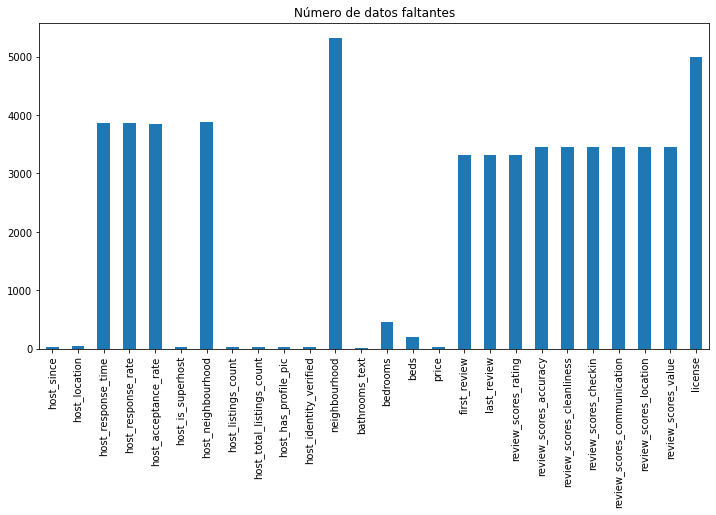

In [7]:
plt.rcParams["figure.figsize"] = (12,6)
listing.isna().sum()[listing.isna().sum() != 0].plot(kind = "bar")
plt.title("Número de datos faltantes")
plt.show()

Observamos que hay muchas variables que concretamente tienen 33 missings, miraremos si se trata de que hay 33 observaciones que tienen missings en todas estas variables o se trata de una coincidencia y son realmente aleatorios.

In [8]:
listing[listing["host_since"].isnull()].head()

,Unnamed: 0,id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_diff,days_booked
2067,2067,7089196,35982249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,f,1,0,1,0,0,2
2201,2201,7711359,2550257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,f,1,0,1,0,0,89
2319,2319,8263101,37078579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,f,1,0,1,0,0,89
6077,6077,24448276,402350551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.00,5.00,HUTB-004860,t,36,36,0,0,2,24
6078,6078,24448277,402350551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.67,4.67,HUTB-004872,t,36,36,0,0,0,89


Como podemos observar parece que coinciden, por lo tanto como solo se trata de 33 observaciones, quitaremos estas observaciones, ya que contienen missings en muchas variables.

In [9]:
listing = listing[-listing["host_since"].isnull()]

In [10]:
listing.isna().sum()[listing.isna().sum() != 0]

host_location                    11
host_response_time             3826
host_response_rate             3826
host_acceptance_rate           3815
host_neighbourhood             3854
neighbourhood                  5288
bathrooms_text                   11
bedrooms                        463
beds                            195
price                            33
first_review                   3308
last_review                    3308
review_scores_rating           3308
review_scores_accuracy         3440
review_scores_cleanliness      3438
review_scores_checkin          3444
review_scores_communication    3439
review_scores_location         3444
review_scores_value            3445
license                        4993
dtype: int64

Observamos que quedan 11 missings tanto en la variable "host_location" como en la variable "bathrooms_text", observamos también que los 33 missings de la variable "price" no coincidian con los anteriores, pero aún asi eliminaremos esas observaciones, ya que la variable price la considerariamos una de las más importantes y solo se trata de 33 observaciones.

In [11]:
listing = listing[-listing["price"].isnull()]
listing = listing[-listing["host_location"].isnull()]
listing = listing[-listing["bathrooms_text"].isnull()]

Miramos otra vez la tabla de valores missing para ver como ha quedado.

In [12]:
listing.isna().sum()[listing.isna().sum() != 0]

host_response_time             3800
host_response_rate             3800
host_acceptance_rate           3796
host_neighbourhood             3837
neighbourhood                  5258
bedrooms                        459
beds                            191
first_review                   3283
last_review                    3283
review_scores_rating           3283
review_scores_accuracy         3412
review_scores_cleanliness      3410
review_scores_checkin          3416
review_scores_communication    3411
review_scores_location         3416
review_scores_value            3417
license                        4968
dtype: int64

Pasamos con otra variable con valores missing, la variable "license", la cual muestra si el piso tiene alguna licencia y, cual tiene o si en otro caso esta exempta. Devido al gran número de tipo de licencias que hay y que desconozco, vamos a simplificar la variable, convirtiendo cualquir tipo de licencia en un "Yes" dejando los "Exempt" y poniendo un "Unknown" en cada missing.

In [13]:
# TRANSFORMAMOS LA VARIABLE LICENSE
listing["license"] = listing["license"].astype("object")
listing["license"] = listing["license"].fillna("Unknown")
l1 = listing["license"][listing["license"] != "Unknown"]
l2 = listing["license"][listing["license"] != "Exempt"]
listing["license"][list(set(l1.index) & set(l2.index))] = "Yes"
listing["license"] = listing["license"].astype("category")

C:\Users\Andreu\AppData\Local\Temp\ipykernel_14264\2229088814.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing["license"][list(set(l1.index) & set(l2.index))] = "Yes"


In [14]:
listing["license"].value_counts()

Yes        5268
Unknown    4968
Exempt     3016
Name: license, dtype: int64

Eliminamos la variable "neighbourhood" ya que la variable "neighbourhood_cleansed" aporta información más detallada y no contiene valores missing y, eliminamos también la variable "reviews_per_month" ya que nos estamos centrando en un periodo de tiempo concreto y ya tenemos el número de reviews para ese intervalo.

In [15]:
# ELIMINAMOS VARIABLES QUE NO COSIDERAMOS ÚTILES
del listing["neighbourhood"]
# ELIMINAMOS TAMBIÉN LAS VARIABLES FIRST Y LAST REVIEW YA QUE ESTAN EN FORMATO FECHAS Y NO LAS CONSIDERAMOS RELEVANTES
del listing["first_review"]
del listing["last_review"]

Para las variables "host_response_time" y "host_response_rate" observamos que tienen el mismo numero de missings y que se encuentran en las mismas observaciones. Substituiremos los missing de "host_response_time" por "Unknown" y imputaremos mas adelante los missings de "host_response_rate"

In [16]:
# TRATAMIENTO DE LA VARIABLE "host_response_time"
listing["host_response_time"] = listing["host_response_time"].astype("object")
listing["host_response_time"] = listing["host_response_time"].fillna("Unknown")
listing["host_response_time"] = listing["host_response_time"].astype("category")

Para la variable "host_neighbourhood" haremos los mismo que con la anterior

In [17]:
# TRATAMIENTO DE LA VARIABLE "host_neighbourhood"
listing["host_neighbourhood"] = listing["host_neighbourhood"].astype("object")
listing["host_neighbourhood"] = listing["host_neighbourhood"].fillna("Unknown")
listing["host_neighbourhood"] = listing["host_neighbourhood"].astype("category")

Pasamos a tratar las dos variables que estan en formato de list, "host_verifications" y "amenities", para las cuales lo que haremos sera convertirlas en variables binarias, conteniendo 0 o 1 en función de si esta en la lista o no, para todos los elementos de la lista, para todas las observaciones. En los dos casos guardaremos los distintos outputs, ya que es un proceso largo de ejecutar.

In [17]:
# TRANSFORMACIÓN A BINARIO PARA HOST_VERIFICATIONS
host_verifications = listing["host_verifications"]
cont = 0
df_host_verifications = pd.DataFrame(host_verifications)

In [ ]:
for l in host_verifications:
    l = l.replace("[","")
    l = l.replace("]","")
    l = l.replace("\"","")
    l = l.replace("'","")
    l = l.split(",")
    if l != ['']:
        for elem in l:
            if elem[0] == " ":
                elem = elem[1:]
            if list(df_host_verifications.columns).count(elem) == 0:
                df_host_verifications[elem] = 0
            df_host_verifications[elem].iloc[cont] = 1
    cont = cont + 1

In [27]:
df_host_verifications.to_csv("E:\Data\TFG\df_host_verifications.csv")

In [19]:
amenities = listing["amenities"]
cont = 0
df_amenities = pd.DataFrame(amenities)

In [ ]:
for l in amenities:
    l = l.replace("[","")
    l = l.replace("]","")
    l = l.replace("\"","")
    l = l.split(",")
    if l != ['']:
        for elem in l:
            if elem[0] == " ":
                elem = elem[1:]
            if list(df_amenities.columns).count(elem) == 0:
                df_amenities[elem] = 0
            df_amenities[elem].iloc[cont] = 1
    cont = cont + 1

In [ ]:
df_amenities.to_csv("E:\Data\TFG\df_amenities.csv")

In [18]:
# CARGAMOS LOS DOS DATA FRAMES DE BINARIAS (solo se puede si se ha ejecutado previamente los dos bucles)
df_host_verifications = pd.read_csv("df_host_verifications.csv")
df_amenities = pd.read_csv("df_amenities.csv")

In [19]:
# COMPROVAMOS LAS DIMENSIONES DE LA MATRIZ CREADA ANTERIORMENTE
print(df_amenities.shape)
print(df_host_verifications.shape)

(13252, 659)
(13252, 22)


Podemos observar que en el caso de amenities nos encontramos con un gran número de dimensiones, a continuación observaremos con detalle el data frame para ver si podemos reducir sus dimensiones, ya que 657 variables nuevas podrian suponer un problema.

In [20]:
df_amenities = df_amenities.drop(columns=["Unnamed: 0","amenities"])
s_amenities = df_amenities.sum()

In [21]:
math.fsum(s_amenities >= 1000)

52.0

Observamos que de las 657 amenities, solo 52 tienen mas de 1000 observaciones, así que nos quedaremos con estas 52 y descartaremos las demas, ya que tienen muy poca relevancia en la base de datos. Repetimos lo mismo para la variable "host_verifications"

In [22]:
df_host_verifications = df_host_verifications.drop(columns=["Unnamed: 0","host_verifications"])
s_host_verifications = df_host_verifications.sum()

In [23]:
math.fsum(s_host_verifications >= 500)

11.0

Vemos que solo 11 son superiores a 500, por lo tanto nos quedaremos con estas 11. Procedemos ahora a añadir estas variables a la base de datos.

In [24]:
amenities_index = s_amenities[s_amenities >= 1000].index
df_amenities[amenities_index]

,TV,Wifi,Hair dryer,Washer,Dedicated workspace,Kitchen,Host greets you,Crib,Heating,Elevator,...,Room-darkening shades,Toaster,Dining table,Freezer,Drying rack for clothing,Hot water kettle,Shower gel,Lock on bedroom door,Cleaning products,Wine glasses
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,1,1,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13247,1,1,1,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
13248,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13249,1,1,1,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
13250,1,1,1,1,0,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0


In [25]:
host_verifications_index = s_host_verifications[s_host_verifications >= 500].index
df_host_verifications[host_verifications_index]

,email,phone,reviews,jumio,government_id,offline_government_id,selfie,identity_manual,facebook,work_email,google
0,1,1,1,1,1,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,0,0,0
2,1,1,1,1,1,0,0,0,1,1,0
3,1,1,1,1,1,1,0,0,0,1,0
4,1,1,1,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
13247,1,1,1,1,1,0,0,0,0,0,0
13248,1,1,0,0,0,0,0,0,0,0,0
13249,1,1,0,0,0,0,0,0,0,0,0
13250,1,1,1,1,1,1,1,1,0,0,0


In [26]:
listing = pd.concat([listing.reset_index(drop=True),df_amenities[amenities_index].reset_index(drop=True)], axis = 1)
listing = pd.concat([listing.reset_index(drop=True),df_host_verifications[host_verifications_index].reset_index(drop=True)], axis = 1)

In [27]:
del listing["amenities"]
del listing["host_verifications"]
del listing["Unnamed: 0"]

Transformaremos la variable "host_since" a entera a traves de hacer la diferencia de dias con el dia que han sido recogidos los datos.

In [28]:
from datetime import datetime

def days_between(d):
    d = datetime.strptime(d, "%Y-%m-%d")
    return abs((d - datetime.strptime("2022-09-10", "%Y-%m-%d")).days)

listing["host_since"] = listing["host_since"].apply(days_between)

Pasamos ahora a tratar los missings que quedan, los cuales trataremos a traves del metodo de imputación KNN.

In [29]:
listing.isna().sum()[listing.isna().sum() != 0]

host_response_rate             3800
host_acceptance_rate           3796
bedrooms                        459
beds                            191
review_scores_rating           3283
review_scores_accuracy         3412
review_scores_cleanliness      3410
review_scores_checkin          3416
review_scores_communication    3411
review_scores_location         3416
review_scores_value            3417
dtype: int64

Generamos las variables "dummy" para las tres variables binarias que esta codificadas como "t" o "f"

In [30]:
cat_variables = listing[["host_is_superhost", "host_has_profile_pic", "host_identity_verified"]]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
cat_dummies

,host_is_superhost_t,host_has_profile_pic_t,host_identity_verified_t
0,0,1,1
1,0,1,1
2,0,1,1
3,1,1,1
4,0,1,1
...,...,...,...
13247,0,1,1
13248,0,1,1
13249,0,1,1
13250,0,1,1


Seleccionamos ahora las variables númericas que utilizaremos para imputar los missings.

In [31]:
var_float = listing.select_dtypes(['float']).columns
var_int = listing.select_dtypes(['int']).columns

In [32]:
var_float = var_float.drop(['latitude', 'longitude'])
var_int = var_int.drop(['host_id','id'])

Creamos el data frame que contiene todas las variables numericas, a partir del cual imputaremos los datos faltantes.

In [33]:
df = pd.concat([listing[var_float],listing[var_int],cat_dummies], axis = 1)

In [34]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

Añadimos las variables "latitude" y "longitude" las cuales no se utilizaran en el modelo pero seran de gran uso para realizar distintos mapas

In [35]:
df = pd.concat([df,listing["latitude"],listing["longitude"]], axis = 1)

Vamos a redondear las variables "bedrooms" y "beds", ya que al imputar con el KNN utilizando k=5, obtenemos la media de 5 valores por lo tanto no siempre obtenemos valores enteros.

In [36]:
df["beds"] = round(df["beds"])
df["bedrooms"] = round(df["bedrooms"])

Para finalizar hacemos la matriz de correlaciones para observar que no haya variables que esten muy correlacionadas y por lo tanto puedan ser eliminadas.

In [37]:
corMatrix = df.corr()
corMatrix[corMatrix<0.5] = 0
corMatrix

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,bedrooms,beds,price,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,...,selfie,identity_manual,facebook,work_email,google,host_is_superhost_t,host_has_profile_pic_t,host_identity_verified_t,latitude,longitude
host_response_rate,1.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
host_acceptance_rate,0.0,1.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
host_listings_count,0.0,0.0,1.0,1.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
host_total_listings_count,0.0,0.0,1.0,1.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bedrooms,0.0,0.0,0.0,0.0,1.0,0.79451,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
host_is_superhost_t,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
host_has_profile_pic_t,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
host_identity_verified_t,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
latitude,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Observamos tambien que no haya correlaciones negativas.

In [38]:
NegcorMatrix = df.corr()
NegcorMatrix[NegcorMatrix>-0.5] = 0
NegcorMatrix

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,bedrooms,beds,price,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,...,selfie,identity_manual,facebook,work_email,google,host_is_superhost_t,host_has_profile_pic_t,host_identity_verified_t,latitude,longitude
host_response_rate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
host_acceptance_rate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
host_listings_count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
host_total_listings_count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bedrooms,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
host_is_superhost_t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
host_has_profile_pic_t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
host_identity_verified_t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
latitude,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Observamos que hay una altisima correlacion entre todas las variables de "minimum_nights" y "maximum_nights" por lo tanto nos quedaremos solo con estas ya que son las mas básicas. Tambien vemos que las variables "host_listings_count" y "host_total_listings_count" son la misma ya que tienen una correlacion de 1, por lo tanto tambien eliminamos una.

In [39]:
# BORRAMOS MUCHAS DE LAS VARIABLES CORRELACIONADAS
del df["minimum_nights_avg_ntm"]
del df["maximum_nights_avg_ntm"]
del df["minimum_minimum_nights"]
del df["maximum_minimum_nights"]
del df["minimum_maximum_nights"]
del df["maximum_maximum_nights"]
del df["host_total_listings_count"]

Añadimos a continuación las variables categoricas que no habiamos incluido para realizar el KNN.

In [40]:
var_cat = listing.select_dtypes(['category']).columns
var_cat

Index(['host_location', 'host_response_time', 'host_is_superhost',
       'host_neighbourhood', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'property_type', 'room_type', 'bathrooms_text', 'license',
       'instant_bookable'],
      dtype='object')

In [41]:
df = pd.concat([listing["id"],listing["host_id"],df,listing[var_cat]], axis = 1)

Borramos las 3 variables dummy que habiamos creado para la imputación KNN.

In [42]:
del df["host_is_superhost_t"]
del df["host_has_profile_pic_t"]
del df["host_identity_verified_t"]

Finalmente guardamos la base de datos final.

In [43]:
df.to_csv("E:\Data\TFG\df_final.csv")